In [7]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit

figpath="../../figures/kernel/"

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

In [36]:
nside=64; upnside=2048 ; npix=h.nside2npix(upnside)
lmax=3*nside ; lmin=2

odisc=min(180.,180.*(24./lmax))
print odisc

y=rk.real_space_queb_kernels(nside,tmax=odisc,maxlmax=6*nside,sampling=800)
y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmax,lmin)
y.setup_fn_rad_ker()

22.5


In [148]:
# make plots of Mr and Mi
mr=zeros(npix,float) ; mi=zeros(npix,float)
Ir=zeros(npix,float) ; Ii=zeros(npix,float)
Jr=zeros(npix,float) ; Ji=zeros(npix,float)

thetain=90. ; lonin=90. ; latin=90.-thetain 
i=h.ang2pix(upnside,thetain*pi/180.,lonin*pi/180.)
lat,lon=h.pix2ang(upnside,i) ; lat=90. - lat*180./pi ; lon=lon*180./pi; print round(lat),round(lon)
a,b,g,pix2=y.return_euler_angles(upnside,i,180.)
mr[pix2]=cos(2.*a)*y.fn_rad_ker(b) ; mi[pix2]=sin(2.*a)*y.fn_rad_ker(b)
Ir[pix2]=cos(2.*(a+g))*y.fn_rad_ker_m2(b) ; Ii[pix2]=sin(2.*(a+g))*y.fn_rad_ker_m2(b)
Jr[pix2]=cos(2.*(a-g))*y.fn_rad_ker_p2(b) ; Ji[pix2]=sin(2.*(a-g))*y.fn_rad_ker_p2(b)

0.0 90.0


In [140]:
xsize=400  ; reso=(0.7*odisc*60.)/xsize ; grat=2. ; print reso

2.3625


In [141]:
400*2.3625/60

15.749999999999998

<IPython.core.display.Javascript object>


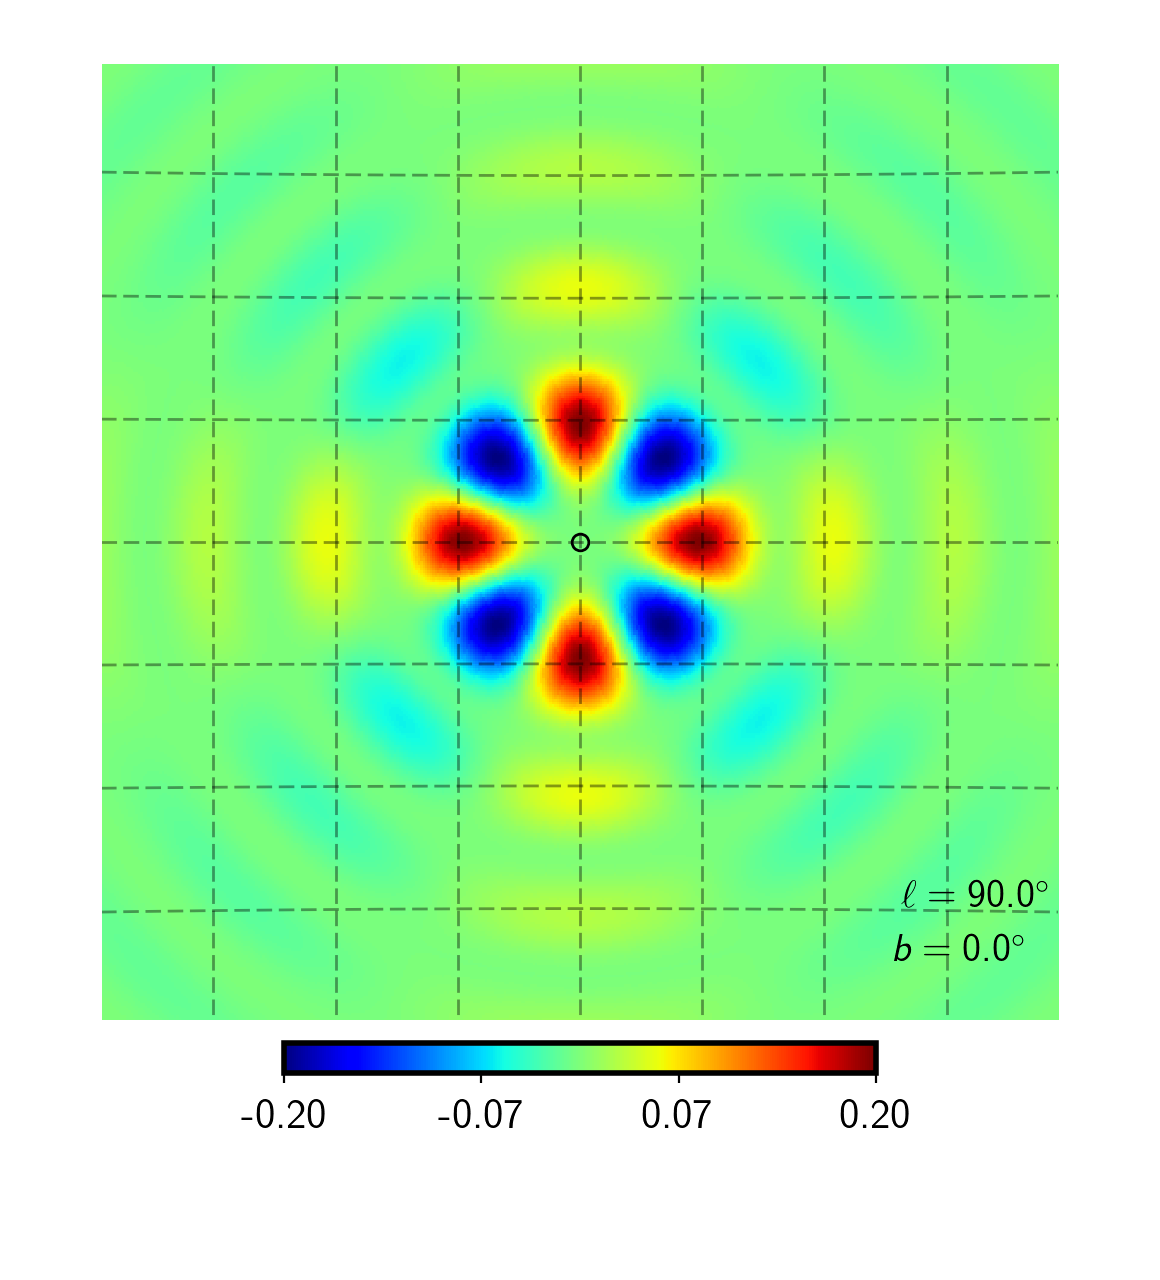

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


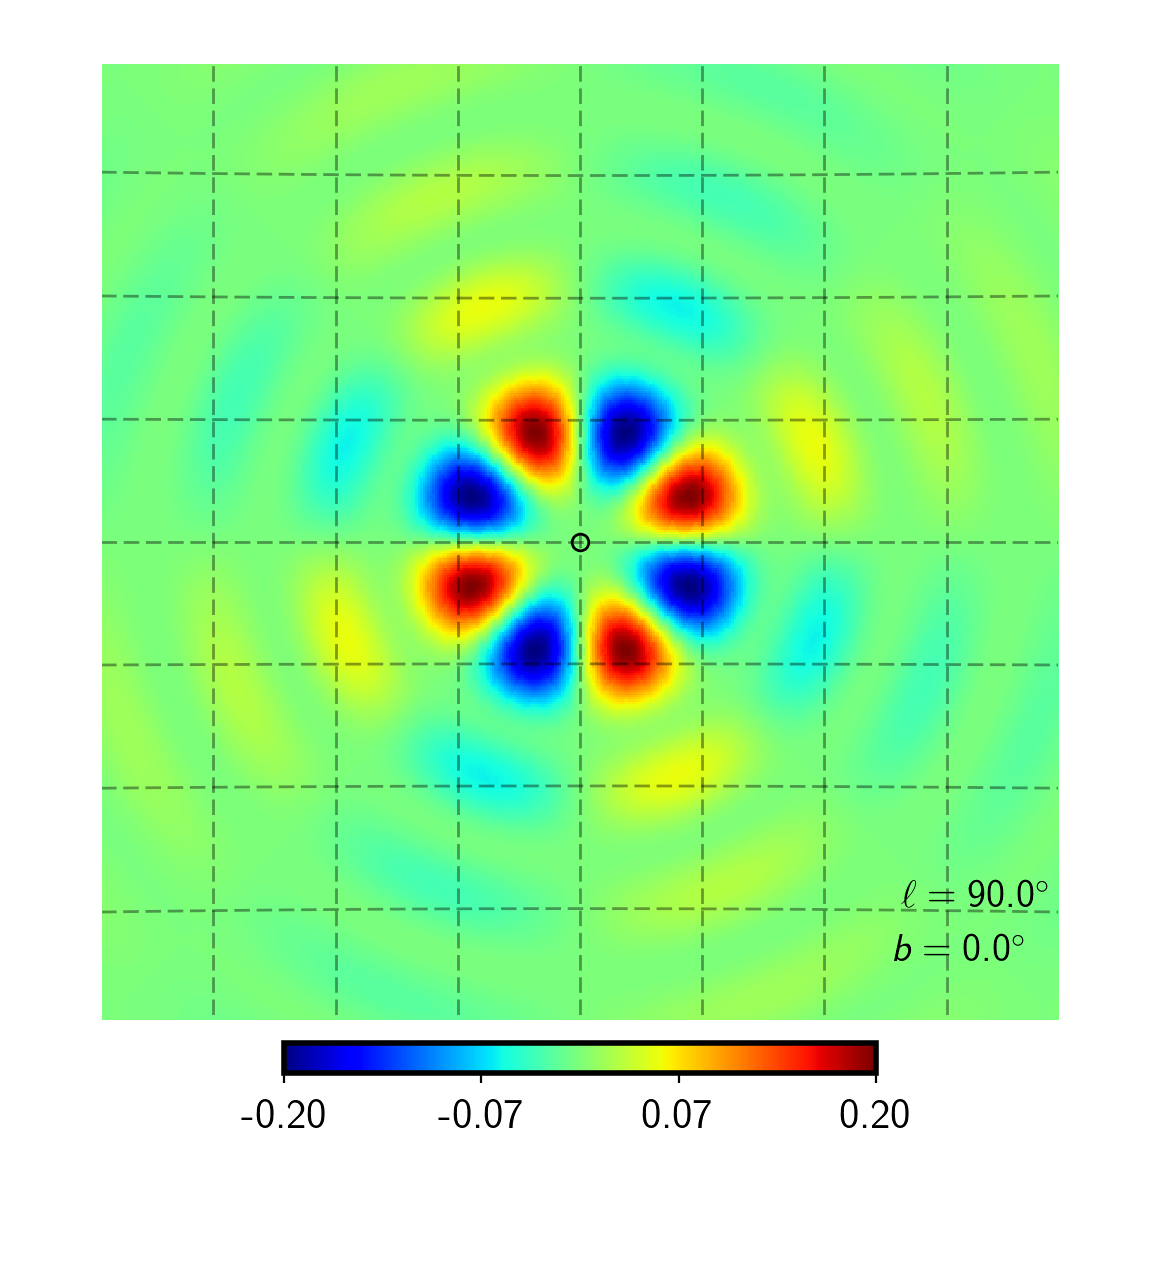

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [142]:
tmap=Jr ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "qu2ebqu_ker_r_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=Ji ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot((0)*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "qu2ebqu_ker_i_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


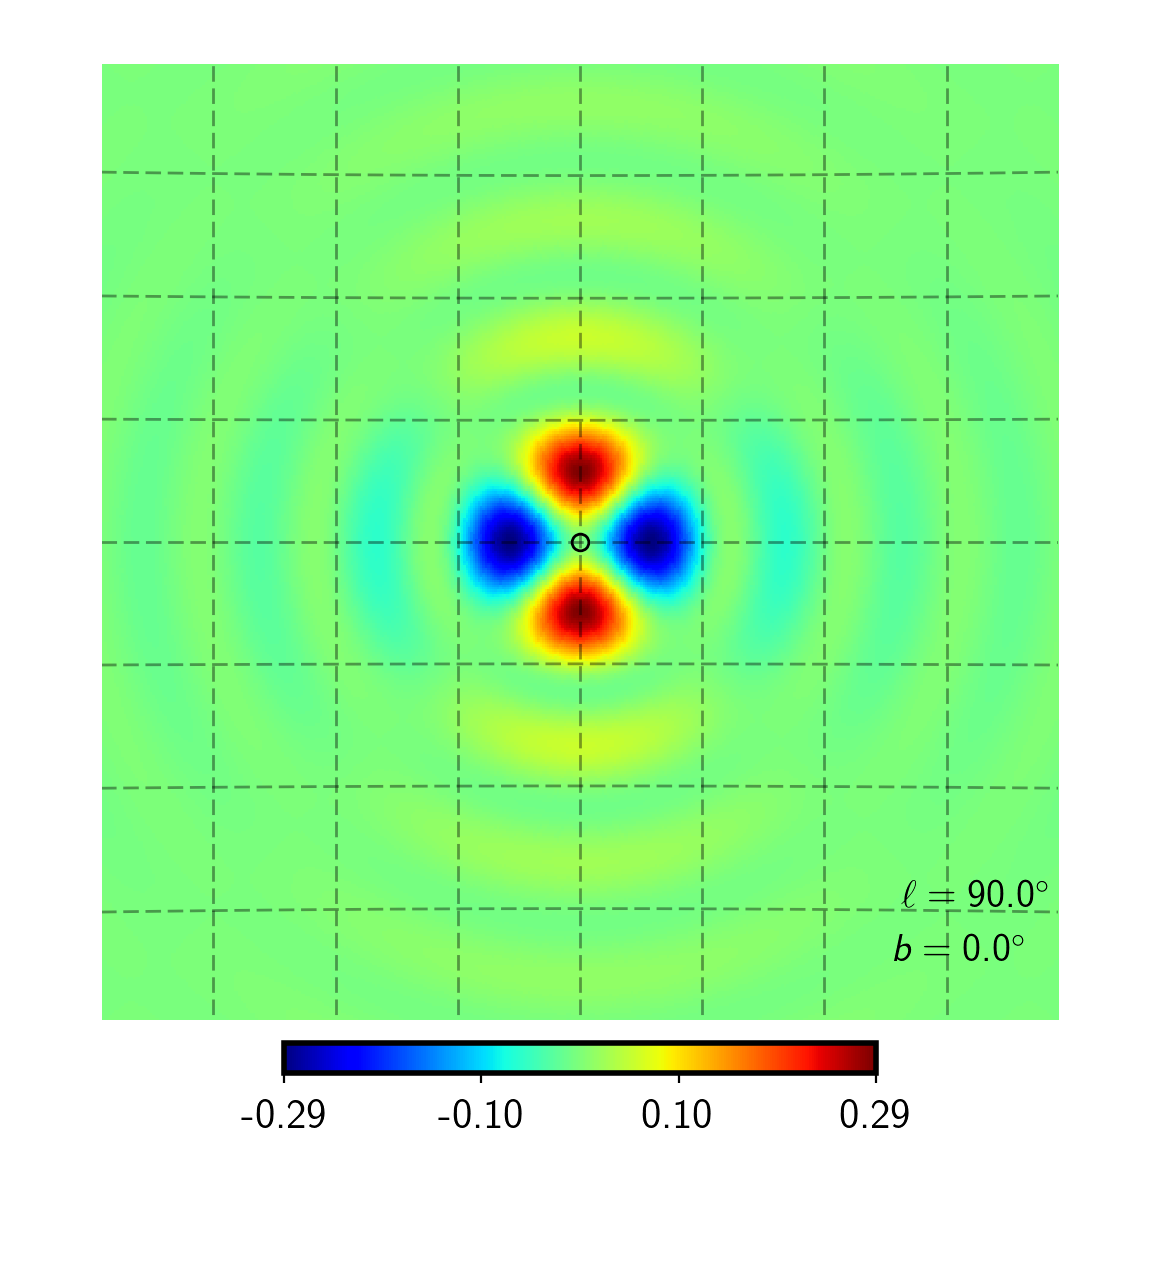

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


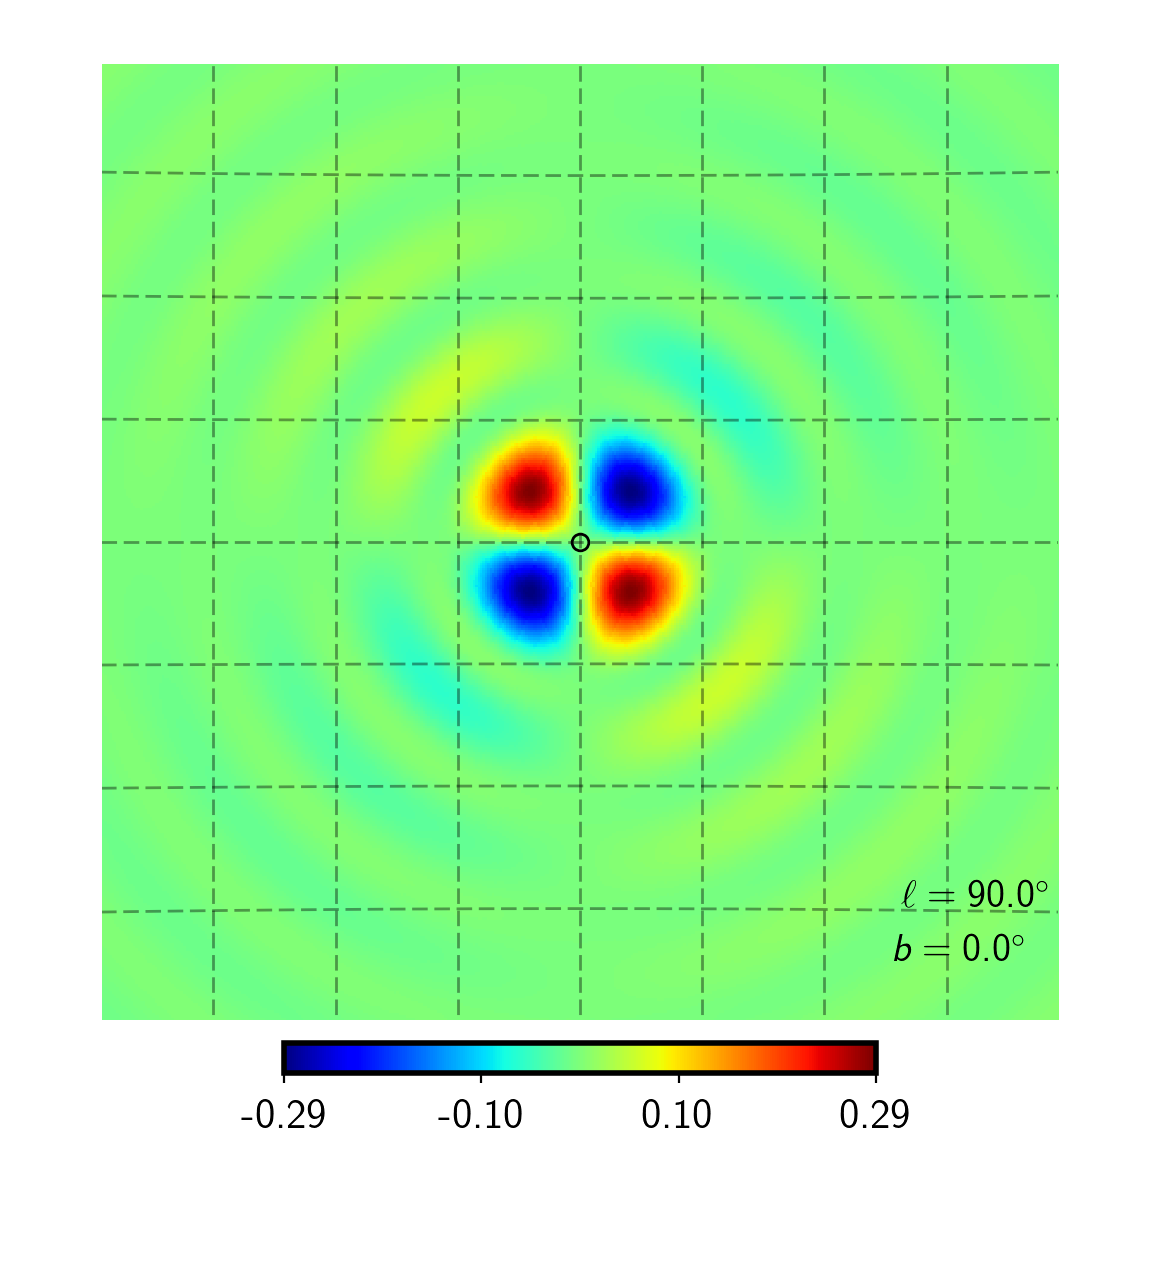

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [143]:
tmap=mr ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "qu2eb_ker_r_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=mi ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90.-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "qu2eb_ker_i_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


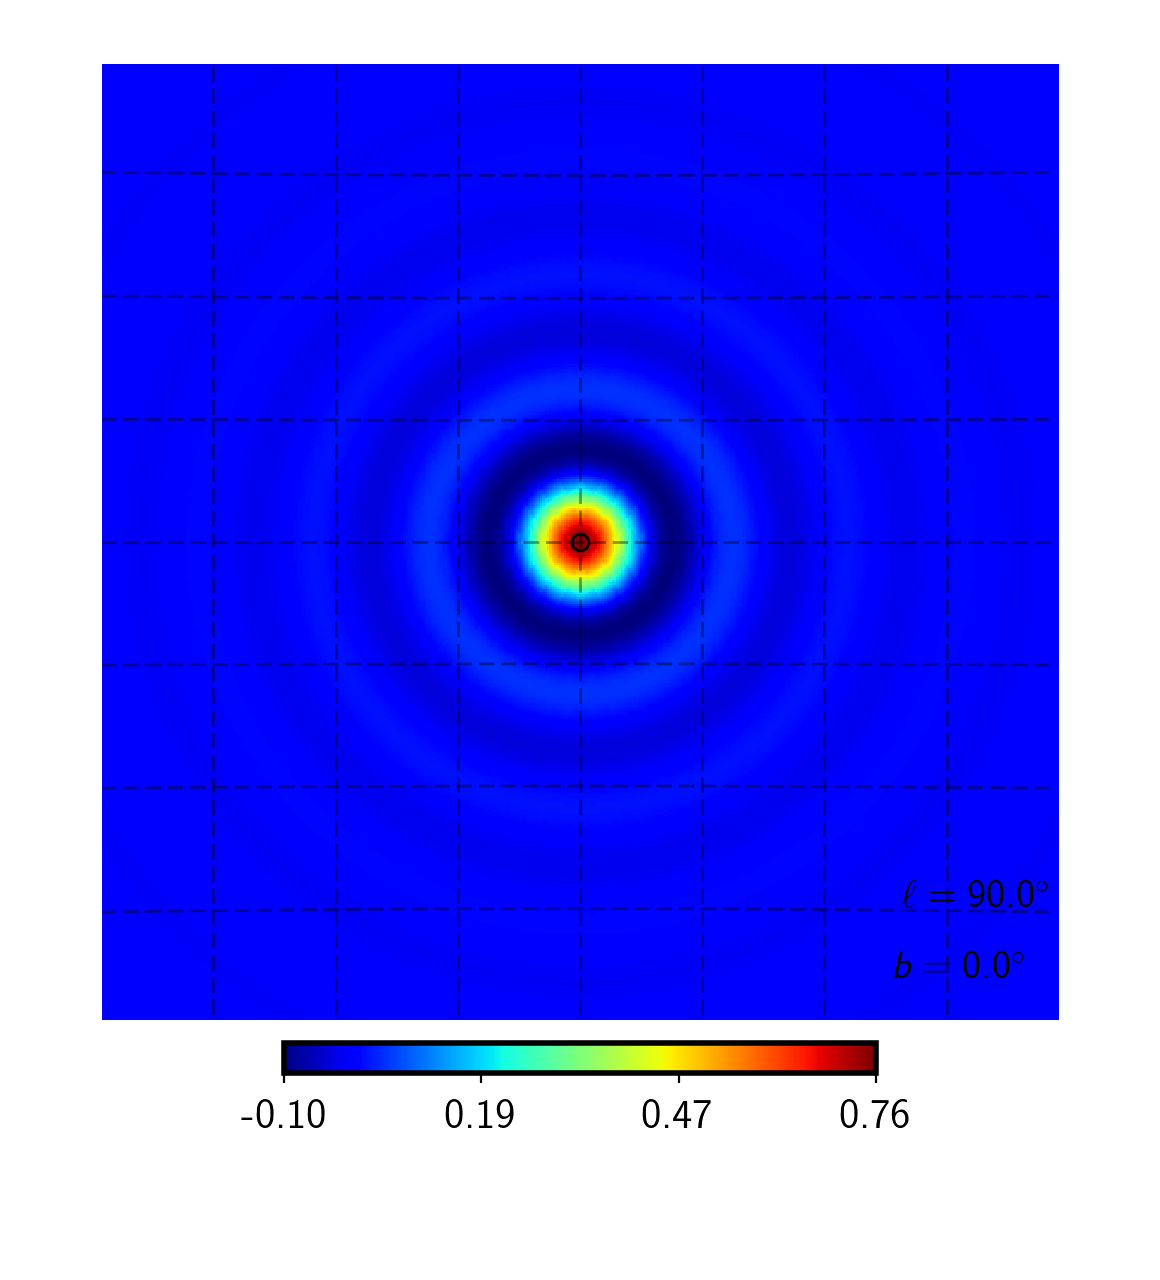

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


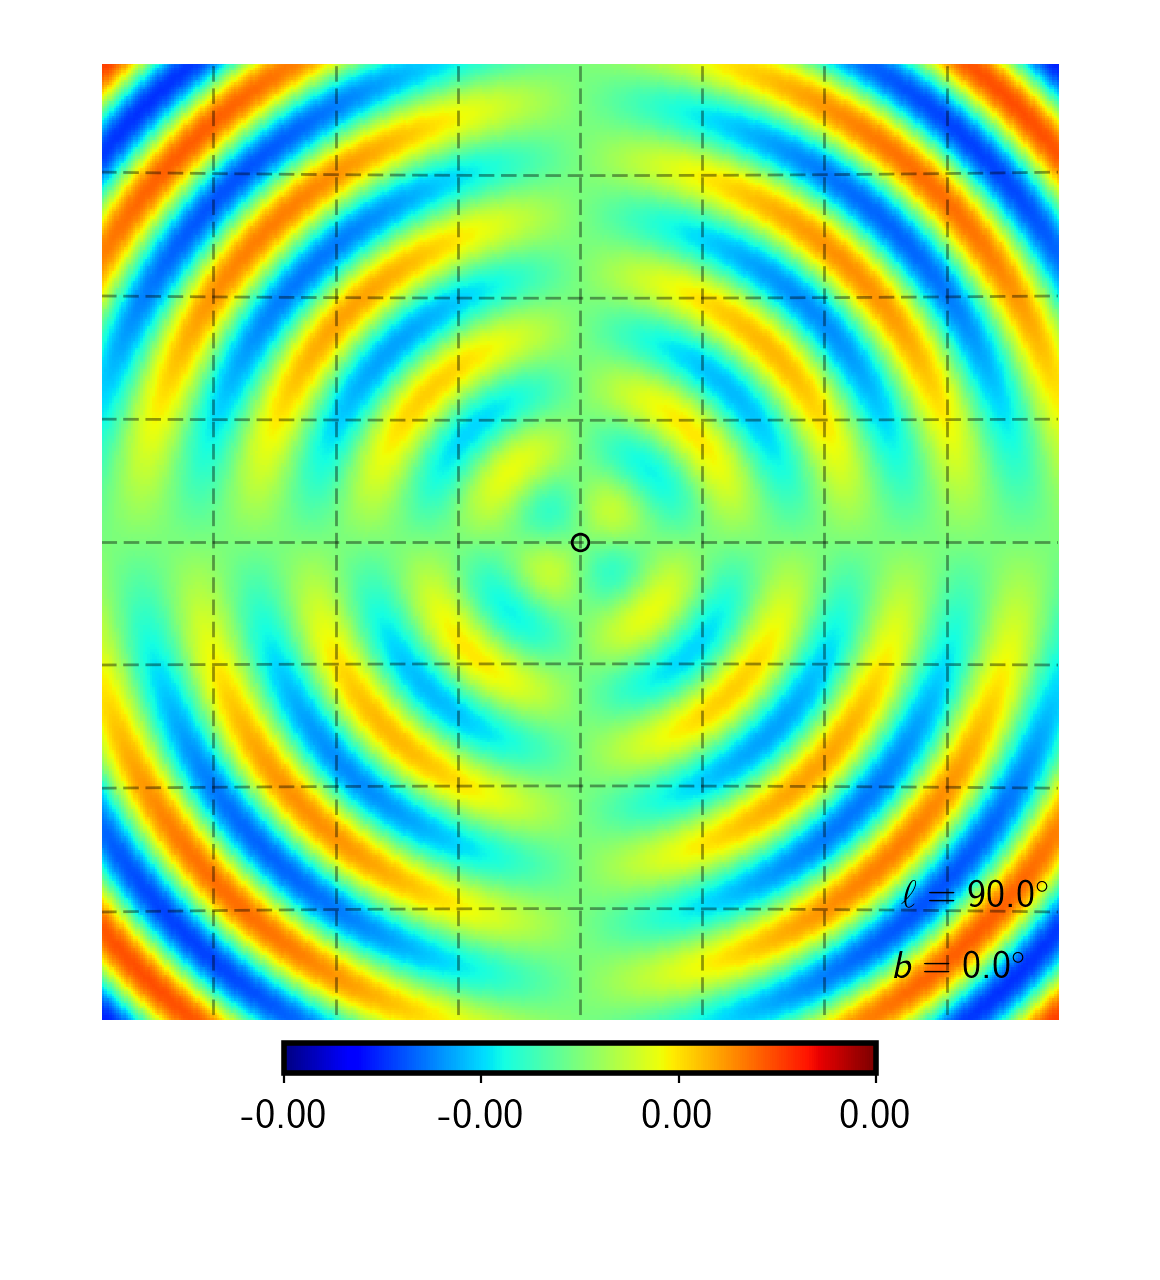

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [144]:
tmap=Ir ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.125,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90.-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "I_ker_r_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=Ii ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.125,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot((0)*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90.-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "I_ker_i_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


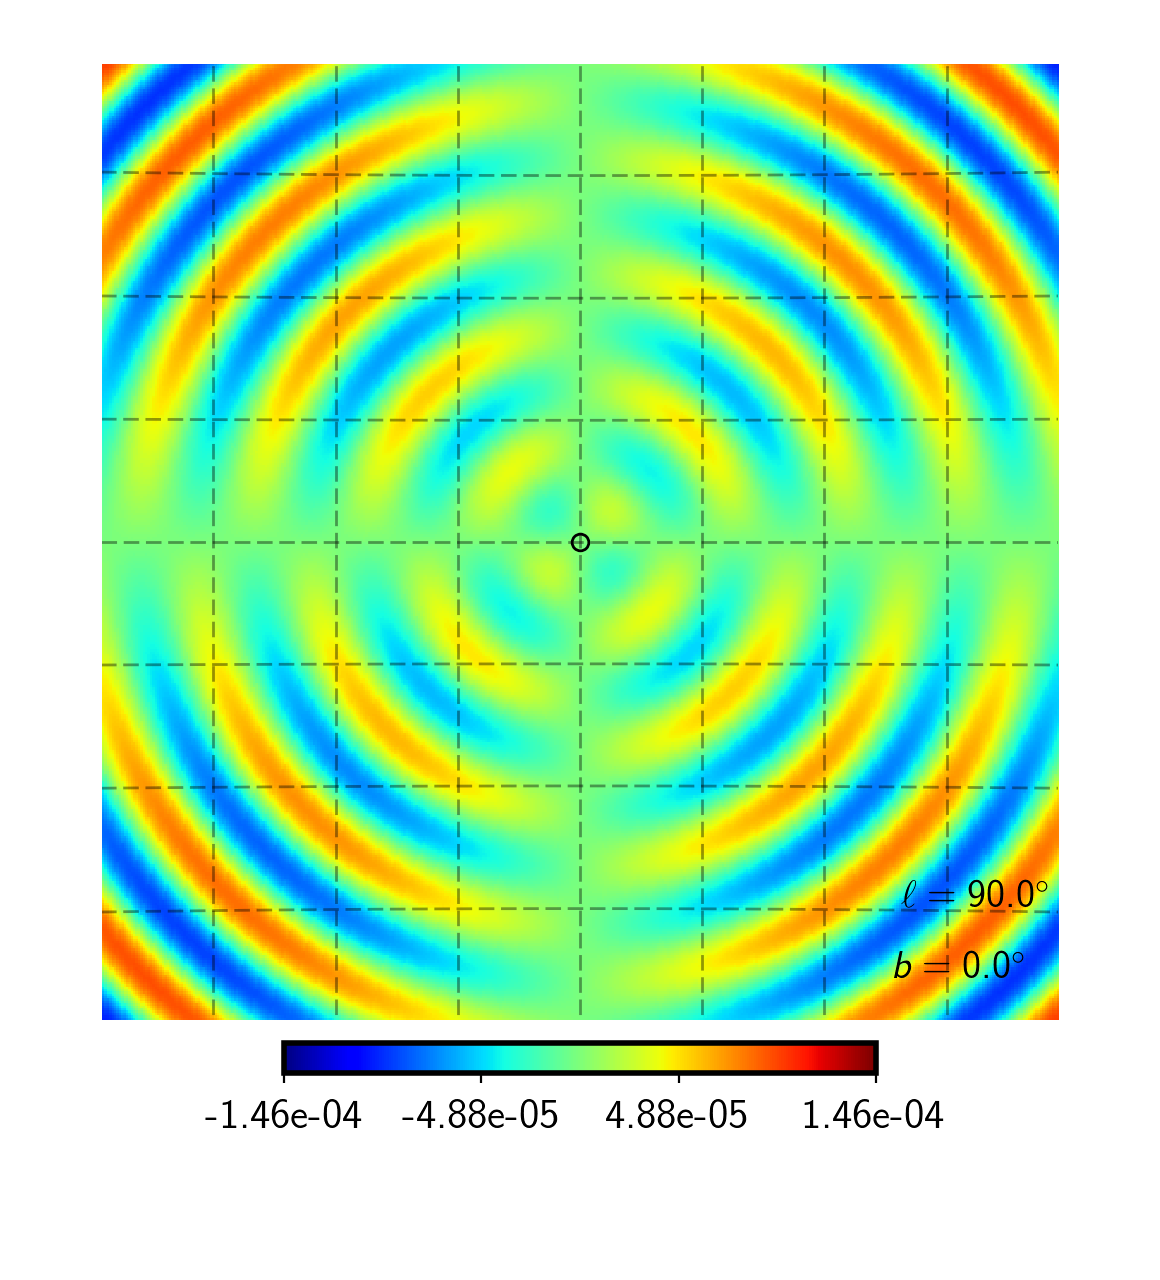

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [146]:
tmap=Ii ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2e")
cmap.solids.set_edgecolor("face")
text(0.09,-0.125,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot((0)*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90.-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
savefig(figpath + "I_ker_i_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


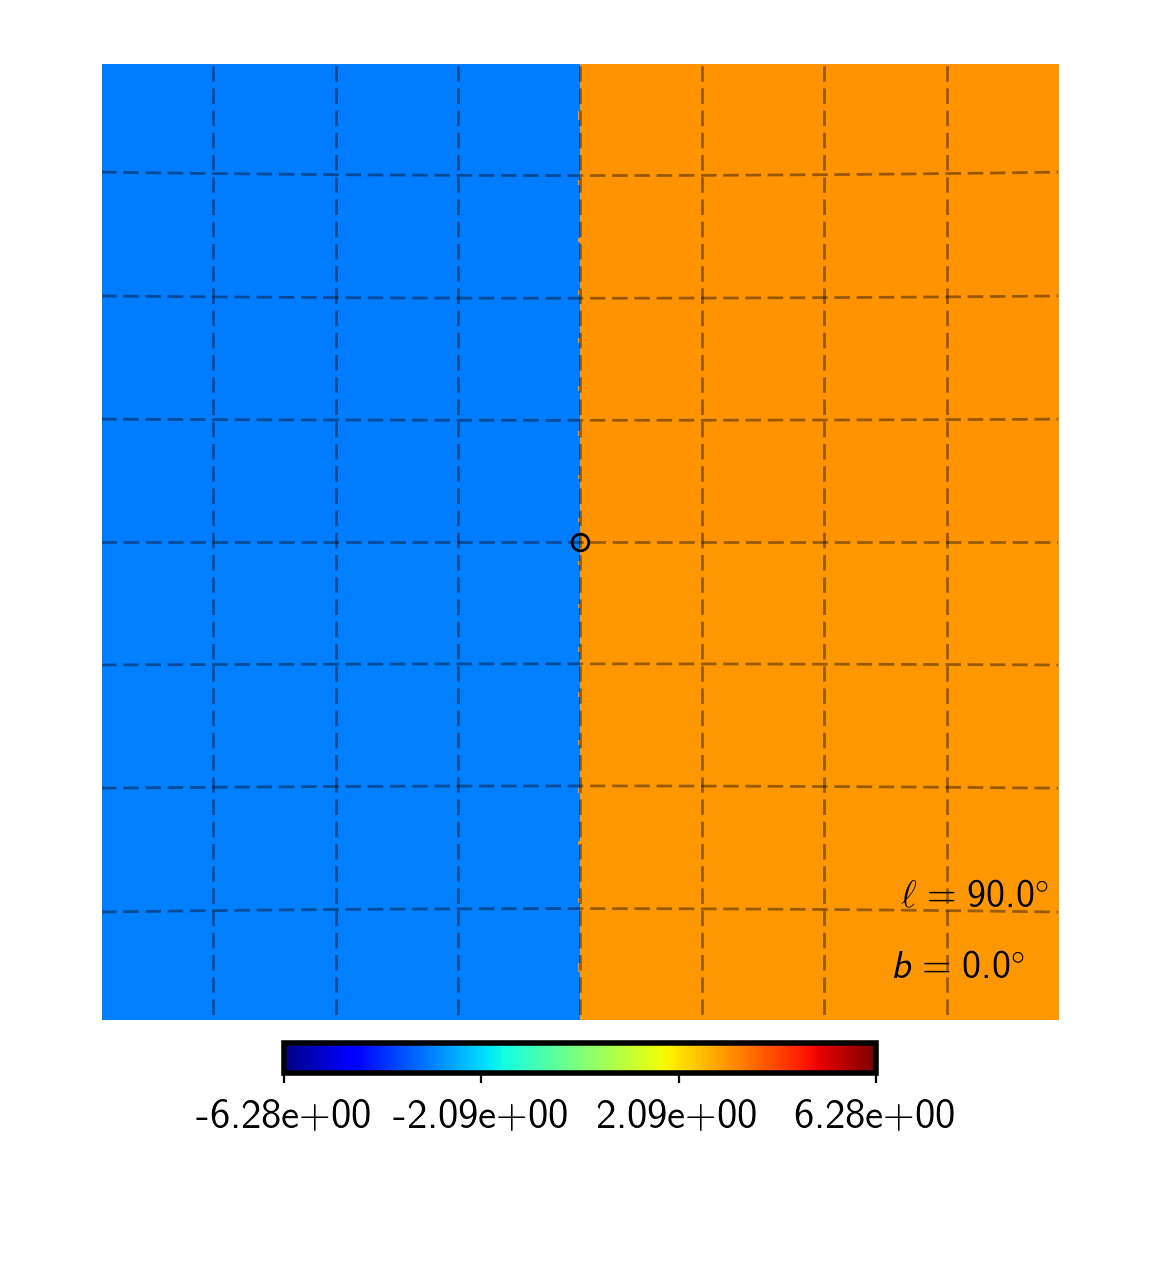

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [153]:
tmap=(a+g); vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2e")
cmap.solids.set_edgecolor("face")
text(0.09,-0.125,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot((0)*np.pi/180,0.*np.pi/180,"*",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)
h.projplot((90.-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=6,markeredgecolor="black",fillstyle="none",markeredgewidth=1.)